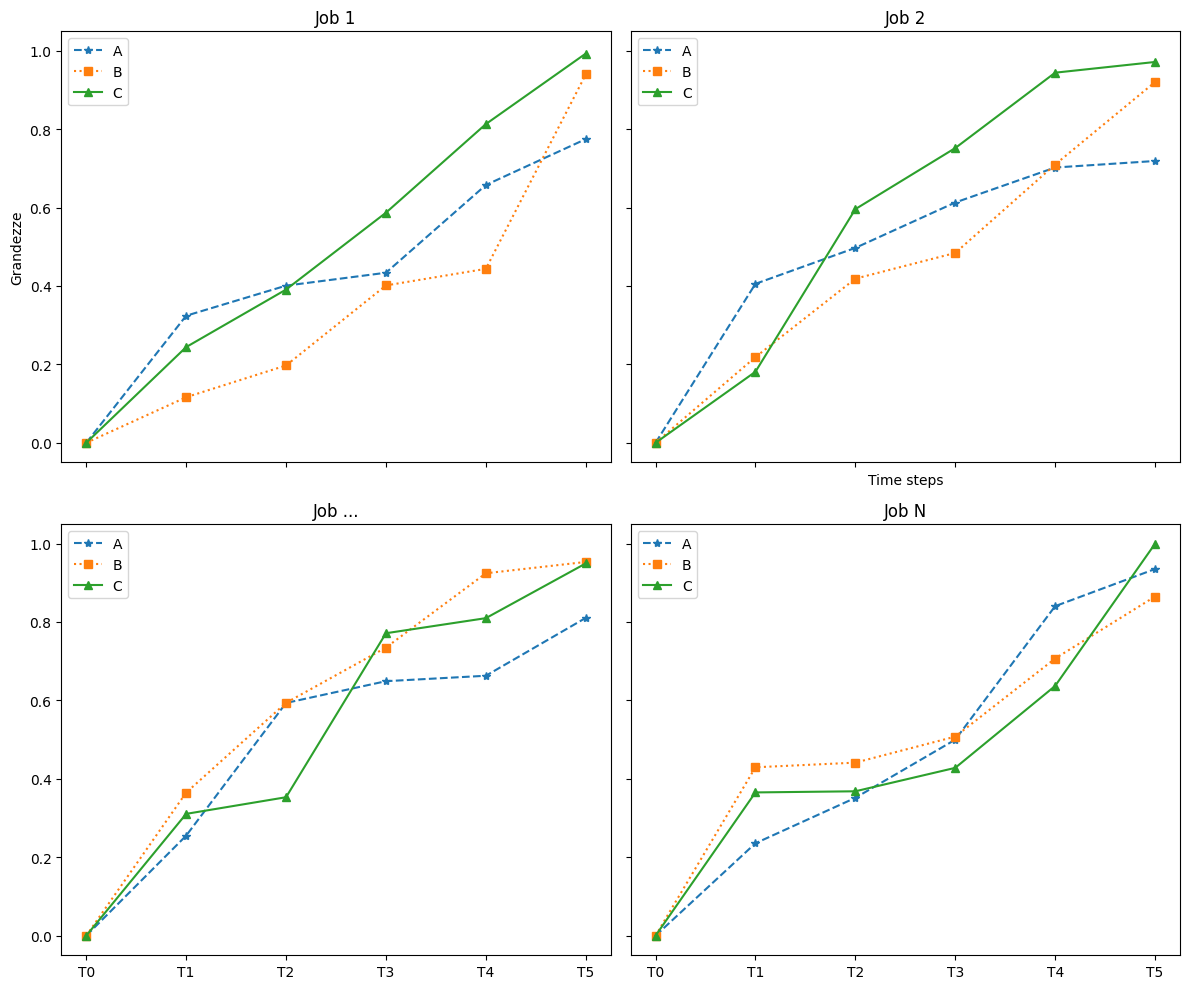

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('science')

timestamps = ['T0', 'T1', 'T2', 'T3', 'T4', 'T5']
def plot_time_series(ax, title, is_last_row, is_first_col):

    # Generiamo valori casuali e monotoni non decrescenti per A, B e C
    # e ordiniamo per garantire la monotonicità
    A_values = np.sort(np.random.rand(len(timestamps)))
    B_values = np.sort(np.random.rand(len(timestamps))) 
    C_values = np.sort(np.random.rand(len(timestamps)))

    A_values[0] *= 0
    B_values[0] *= 0
    C_values[0] *= 0

    ax.plot(timestamps, A_values, linestyle='--', marker='*', color='tab:blue', label='A')
    ax.plot(timestamps, B_values, linestyle=':', marker='s', color='tab:orange', label='B')
    ax.plot(timestamps, C_values, linestyle='-', marker='^', color='tab:green', label='C')
    ax.set_title(title)

    if is_last_row:
        ax.set_xlabel('Time steps')
    if is_first_col:
        ax.set_ylabel('Grandezze')
    ax.legend()

fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)

titles = ['1', '2', '...', 'N']
for i, ax in enumerate(axs.flatten()):
    title = titles[i]
    is_last_row = i == 1
    is_first_col = i == 0
    plot_time_series(ax, f'Job {title}', is_last_row, is_first_col)

plt.tight_layout()
# plt.savefig('images/hj_jobs.pdf', dpi=600)  
plt.show()


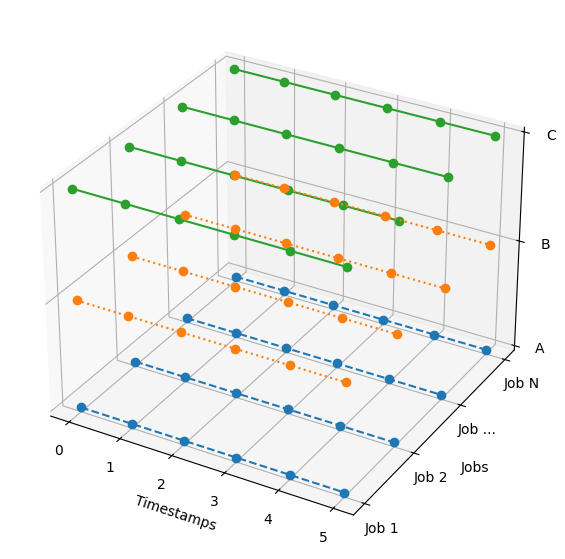

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Creiamo dati fittizi
timestamps = np.array([0, 1, 2, 3, 4, 5])
n_jobs = 4
variables = ['A', 'B', 'C']

# Creiamo una figura e un asse 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Impostazioni per l'aspetto del grafico
colors = ['tab:blue', 'tab:orange', 'tab:green']
linestyles = ['--', ':', '-']

# Funzione per generare serie temporali
def generate_series(length):
    return np.cumsum(np.random.rand(length))

# Disegnamo le serie temporali
for z in range(n_jobs):
    for var_idx, var in enumerate(variables):
        ys = generate_series(len(timestamps))
        ax.plot(timestamps, [var_idx]*len(timestamps), zs=z, zdir='y', 
                linestyle=linestyles[var_idx], marker='o', color=colors[var_idx])

# Etichette degli assi
ax.set_xlabel('Timestamps')
ax.set_ylabel('Jobs')
ax.set_zlabel('Variables')

# Impostiamo il numero di lavori e il nome delle variabili sugli assi
ax.set_yticks(range(n_jobs))
ax.set_yticklabels(['Job 1', 'Job 2', 'Job ...', 'Job N'])
ax.set_zticks(range(len(variables)))
ax.set_zticklabels(variables)

# Mostra il grafico
plt.show()


In [3]:
from scipy import stats

dummy_scores = [0.494, 0.494, 0.494, 0.494, 0.494]
xgboost_scores = [0.792, 0.802, 0.786, 0.772, 0.769]

t_value, p_value = stats.ttest_rel(dummy_scores, xgboost_scores)
print(t_value, p_value)

-47.051898768356544 1.2204949117677298e-06


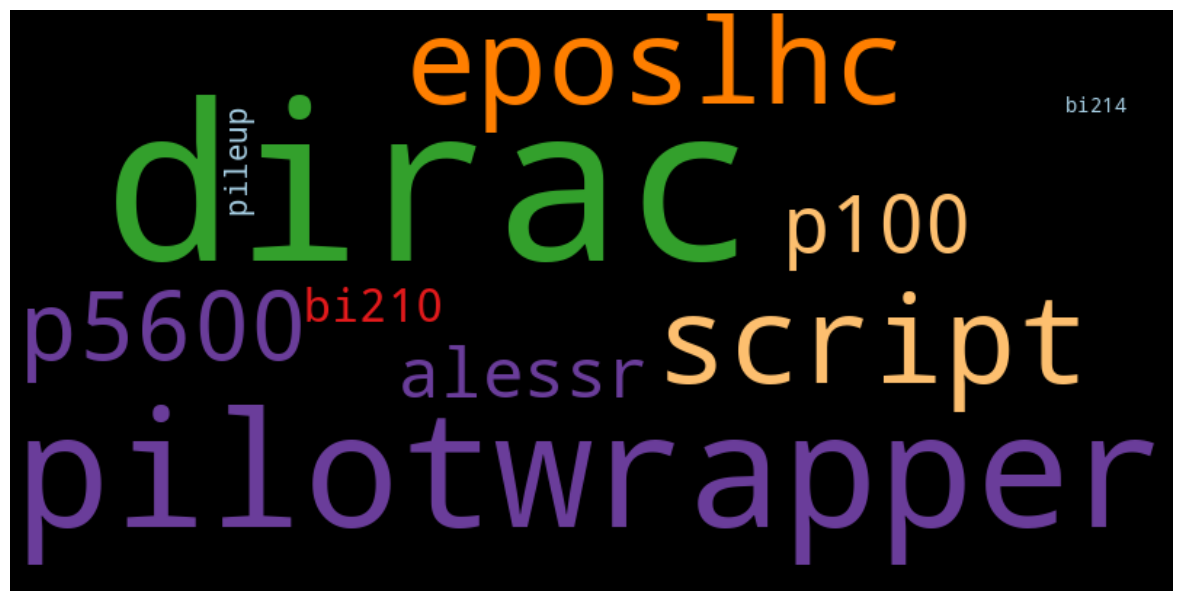

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

word_freqs = {
    'dirac': 142868,
    'pilotwrapper': 142868,
    'script': 72209,
    'eposlhc': 70736,
    'p5600': 42766,
    'p100': 27823,
    'alessr': 21568,
    'bi210': 7544,
    'pileup': 2522,
    'bi214': 754
}

wc = WordCloud(width=800, 
               height=400, 
               background_color="black", 
               colormap="Paired",
               max_font_size=150)

wc.generate_from_frequencies(frequencies=word_freqs)

plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()